# P4 Principal Component Analysis of Faces

## William Koehrsen wjk68

In this notebook, we will look at computing the principal components of face images. We can explore the number of principal components needed to achieve certain levels of variance which could help us compress the number of features in these images.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize

import cv2

from sklearn.decomposition import PCA, FastICA

from sklearn.datasets import fetch_olivetti_faces

# Fetch the Dataset of 400 Faces of 64 x 64 Size

In [2]:
faces_info = fetch_olivetti_faces()
faces = faces_info['data']

With a size of 64 x 64, each image is represented by a 4096 element vector. However, all of these dimensions are not necessary to capture the majority of the variation between faces as we will see when we perform PCA.

# Plot Sample of Faces

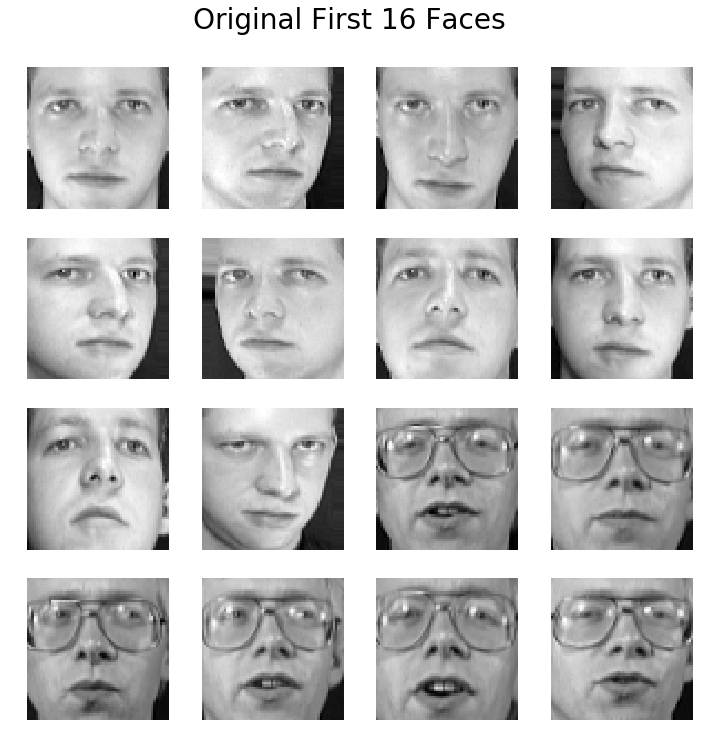

In [3]:
faces = faces.reshape((400, 64, 64))
plt.figure(figsize=(12, 12))

for i in range(16):
    face = faces[i]
    plt.subplot(4, 4, i + 1)
    plt.imshow(face, cmap='gray'); plt.axis('off')

plt.suptitle('Original First 16 Faces', y = 0.95, size = 28)
plt.show();

# Perform PCA with Default Parameters

In [4]:
faces = faces.reshape((400, 64*64))
pca = PCA()
trans = pca.fit_transform(faces)

# Each Image is Now Represented as a 400 Entry Vector

In [5]:
trans.shape

(400, 400)

# Plot Ratio of Explained Variance

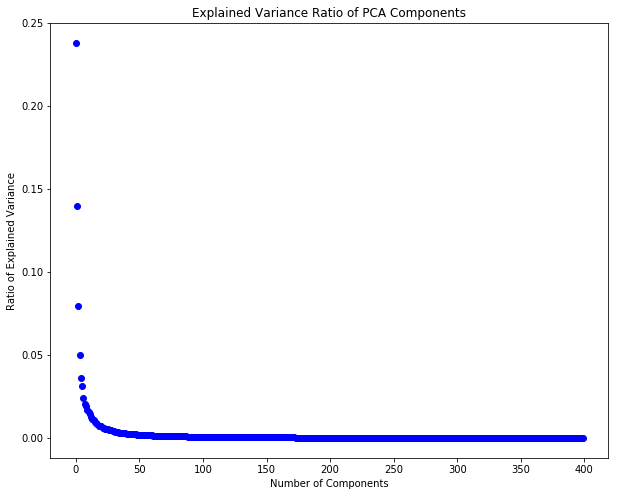

In [6]:
figsize(10, 8)
plt.plot(list(range(len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_, 'bo');
plt.xlabel('Number of Components'); plt.ylabel('Ratio of Explained Variance'); 
plt.title('Explained Variance Ratio of PCA Components');

As can be seen, the first few principal components capture much more of the variance than the remanining components. To better visualize this different, we can plot the _cumulative ratio_ of explained variance. 

# Cumulative Ratio of Explained Variance

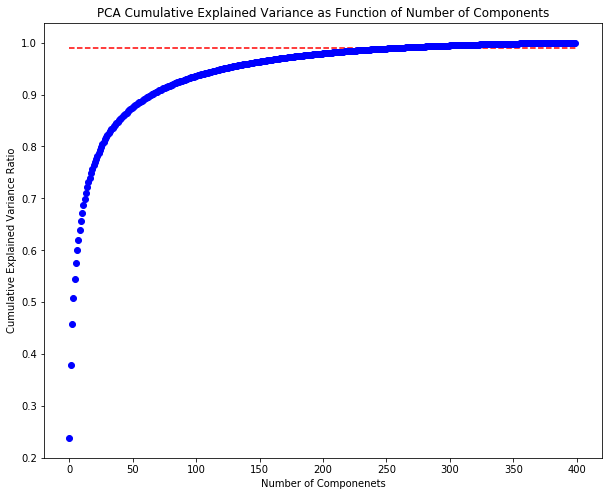

In [7]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(list(range(len(cum_var))), cum_var, 'bo');
plt.hlines(y = 0.99, xmin = 0, xmax = 400, color = 'r', linestyles='--');
plt.xlabel('Number of Componenets'); plt.ylabel('Cumulative Explained Variance Ratio');
plt.title('PCA Cumulative Explained Variance as Function of Number of Components');

In [8]:
print('Number of components needed to explain 99% of the variance:', np.where(cum_var > 0.99)[0][0])

Number of components needed to explain 99% of the variance: 259


# Compress Images to 64 Principal Components

In order to visualize the actual principal components, we can perform PCA with 64 components and plot the 8 x 8 results. We can look at the results and also the total amount of variance explained to see if it is possible to represent these 64 x 64 images accurately as 8 x 8 images.

In [9]:
pca_reduced = PCA(n_components=64)
faces_reduced = pca_reduced.fit_transform(faces.reshape((400, 4096)))

# Visualize Top 16 Principal Components of Faces

Now, we can look at the actual top 16 components. These are not the transformed images themselves, but the components that constitute the faces. The transformed faces now have shape 8 x 8 while each of the components is 4096 (64 * 64)

In [10]:
pca_reduced.components_.shape

(64, 4096)

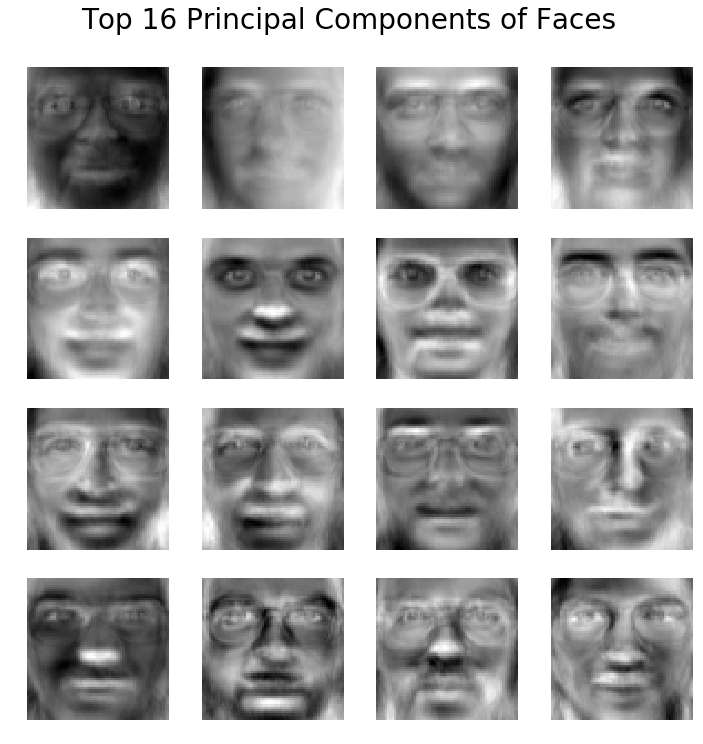

In [11]:
figsize(12, 12)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    pc_face = pca_reduced.components_[i, :].reshape((64, 64))
    plt.imshow(pc_face, cmap='gray', interpolation='nearest'); plt.axis('off')
    
plt.suptitle('Top 16 Principal Components of Faces', y = 0.95, size = 28);
plt.show();

In [12]:
ic = 400 * 4096
nc = (64 * 4096) + (400 * 64)
print('Percentage of Variance Explained by 64 Components {:0.2f}%.'.format(100 * np.sum(pca_reduced.explained_variance_ratio_)))
print('Initial number of parameters to represent images:', ic)
print('Reduced Number of parameters to represent images:', nc)
print('Percentage Reduction in number of parameters {:0.2f}%'.format(100 * (1 - nc/ic)))

Percentage of Variance Explained by 64 Components 89.70%.
Initial number of parameters to represent images: 1638400
Reduced Number of parameters to represent images: 287744
Percentage Reduction in number of parameters 82.44%


As can be seen, we have retained almost 90% of the variation in the images while reducing the number of parameters needed to specify the images by over 80%. From here, we can reconstruct the images using the transformed images and the components.

# Reconstruct and Visualize Images

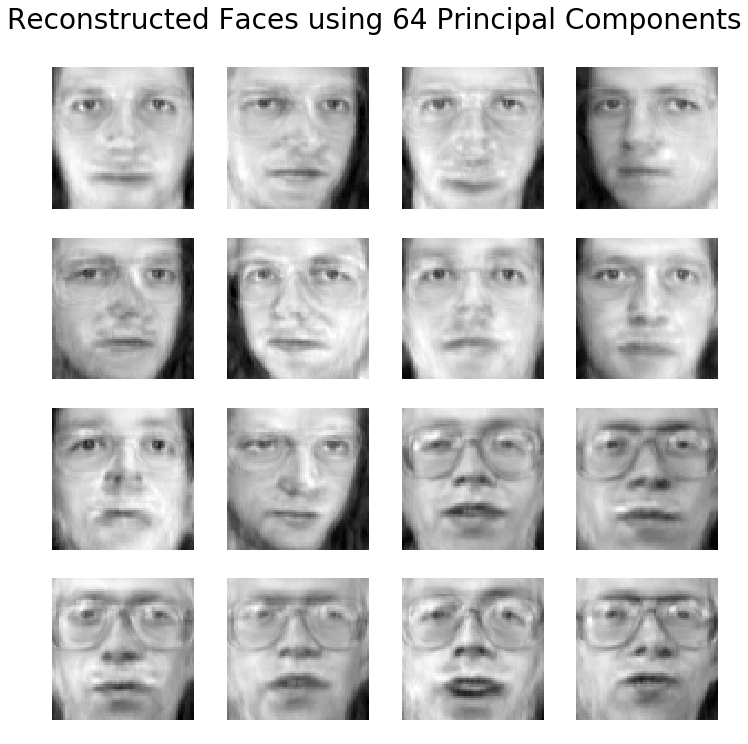

In [13]:
ri = pca_reduced.inverse_transform(faces_reduced).reshape((400, 64, 64))

plt.figure(figsize=(12, 12))

for i in range(16):
    face = ri[i]
    plt.subplot(4, 4, i + 1)
    plt.imshow(face, cmap='gray'); plt.axis('off')

plt.suptitle('Reconstructed Faces using 64 Principal Components', y = 0.95, size = 28)
plt.show();

We can see that using only 64 components still allows us to retain most of the information in the images. If we wanted to compress the size of the image dataset while maintaining enough information to tell images apart, PCA would be a decent option. 

# Independent Component Analysis

In [14]:
ica = FastICA(64)
ica_faces = ica.fit_transform(faces)

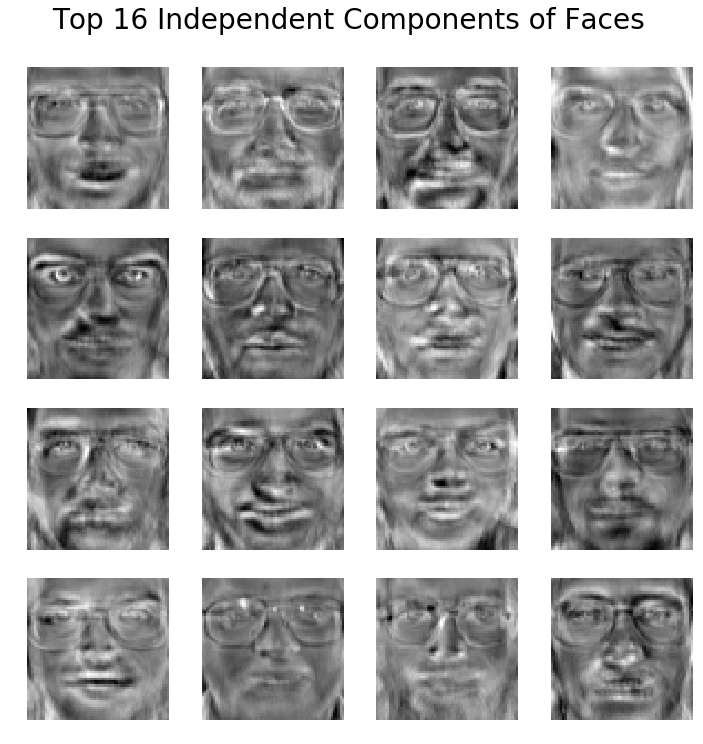

In [15]:
figsize(12, 12)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    ic_face = ica.components_[i, :].reshape((64, 64))
    plt.imshow(ic_face, cmap='gray', interpolation='nearest'); plt.axis('off')
    
plt.suptitle('Top 16 Independent Components of Faces', y = 0.95, size = 28);
plt.show();

These represent the top 16 independent components of faces. We can see how these differ from the principal components and encode different representations in the data. Both PCA and ICA are good methods for reducing the dimensionality of datasets.  

# Conclusion

In this notebook, we loooked at both principal and independent component analysis for reducing the number of dimensions needed to represent images. Both methods are able to decrease the number of dimensions (features) while retaining most of the distinguishing information. In the case of PCA, we reduced the number of parameters needed to describe the entire dataset by 80% while retaining nearly 90% of the variance between images which shows that we do not need all pixel values of the images to accurately represent them. Furthermore, we examined the top 16 principal and independent components of faces which show the features that most distinguish faces. It would be interesting to see how these play into human vision and whether we construct our own set of principal or independent components in order to recognize faces (which we do very well with little conscious effort). This notebook has explored the idea of using dimensionality reduction on images to reduce the amount of redudant information encoded in a dataset. 